# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
from urllib.request import urlopen
import random
import re
# import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
#your code
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
print(soup)


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-b92e9647318f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-5d486a4ede8e.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [12]:
def usuarios(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    names_unpross = soup.find_all("h1", {"class":"h3 lh-condensed"})
    users_unpross = soup.find_all("p", {"class":"f4 text-normal mb-1"})
    names = [i.getText().strip() for i in names_unpross]
    users = [i.getText().strip() for i in users_unpross]
    names_users = []
    for i in range (0, len(names)):
        names_users.append(f"{names[i]} ({users[i]})")
    return names_users

In [13]:
usuarios("https://github.com/trending/developers")

['Olivier Halligon (AliSoftware)',
 'Alon Zakai (kripken)',
 'Ariel Mashraki (a8m)',
 'Azure SDK Bot (azure-sdk)',
 'Kieron Quinn (KieronQuinn)',
 'Jonny Burger (JonnyBurger)',
 'Ayush Chaurasia (AyushExel)',
 'Roberto Butti (roberto-butti)',
 'Costa Huang (vwxyzjn)',
 'Alessandro Ros (aler9)',
 'Kyle Barron (kylebarron)',
 'Nikita Sobolev (sobolevn)',
 'Meng Zhang (wsxiaoys)',
 'Alex Rudenko (OrKoN)',
 'Stanislas Polu (spolu)',
 'R.I.Pienaar (ripienaar)',
 'Lukas Masuch (LukasMasuch)',
 'Alex Yang (himself65)',
 'Wes Bos (wesbos)',
 'Rosalie Wagner (RosaWagner)',
 'Lovell Fuller (lovell)',
 'Erick Wendel (ErickWendel)',
 'Fatih Arslan (fatih)',
 'pngwn (pngwn)',
 'Matthew Feickert (matthewfeickert)']

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [7]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [8]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
repos_unpross = soup.find_all("h2", {"class":"h3 lh-condensed"})
repos_junto = [i.getText().strip().split("/") for i in repos_unpross]
repos = []
for i in range (0, len(repos_junto)):
    repos.append(f"{repos_junto[i][0]}({repos_junto[i][1].strip()})")
repos

['public-apis (public-apis)',
 'SUDO-AI-3D (zero123plus)',
 's0md3v (roop)',
 'xlang-ai (OpenAgents)',
 'AI-Citizen (SolidGPT)',
 'psf (black)',
 'THUDM (AgentTuning)',
 'bregman-arie (devops-exercises)',
 'pyg-team (pytorch_geometric)',
 'bytedance (SALMONN)',
 'donnemartin (system-design-primer)',
 'N1k0la-T (CVE-2023-36745)',
 'firmai (financial-machine-learning)',
 'w-okada (voice-changer)',
 'horizon3ai (CVE-2023-34051)',
 'kyleskom (NBA-Machine-Learning-Sports-Betting)',
 'facebookresearch (seamless_communication)',
 'LAION-AI (Open-Assistant)',
 'danswer-ai (danswer)',
 'XingangPan (DragGAN)',
 'haotian-liu (LLaVA)',
 'iterative (dvc)',
 'mckinsey (vizro)',
 'astral-sh (ruff-pre-commit)',
 'eosphoros-ai (DB-GPT)']

#### Display all the image links from Walt Disney wikipedia page

In [9]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [31]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.find("div", {"class":"mw-page-container"})
image_unpross = body.find_all("img")
images = [i.get("src") for i in image_unpross]
images

['//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/220px-Steamboat-willie.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg/220px-Walt_Disney_Sno

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [68]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [75]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.find("div", {"class":"mw-parser-output"})
prelinks = body.find_all("a")
hrefs = [i.get("href") for i in prelinks]
links_total = []
for i in hrefs:
    if "https" not in i:
        i = "https://en.wikipedia.org" + i
    links_total.append(i)
links = [i for i in links_total if "edit" not in i]        
link = random.choice(links)
link

'https://en.wikipedia.org/wiki/Python_(film)'

In [79]:
res = requests.get(link)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.find("div", {"class":"mw-parser-output"})
prelinks = body.find_all("a")
hrefs = [i.get("href") for i in prelinks]
links_total = []
for i in hrefs:
    if i!=None and "https" not in i:
        i = "https://en.wikipedia.org" + i
    links_total.append(i)
links = [i for i in links_total if i!= None]
links

['https://en.wikipedia.org/wiki/File:Pythoncover.jpg',
 'https://en.wikipedia.org/wiki/Daniel_Knauf',
 'https://en.wikipedia.org/wiki/Garrison_Hershberger',
 'https://en.wikipedia.org/wiki/Robert_Englund',
 'https://en.wikipedia.org/wiki/Casper_Van_Dien',
 'https://en.wikipedia.org/wiki/William_Zabka',
 'https://en.wikipedia.org/wiki/Dana_Barron',
 'https://en.wikipedia.org/wiki/Wil_Wheaton',
 'https://en.wikipedia.org/wiki/Sean_Whalen',
 'https://en.wikipedia.org/wiki/Jenny_McCarthy',
 'https://en.wikipedia.org/wiki/Gary_Grubbs',
 'https://en.wikipedia.org/wiki/Ken_Olandt',
 'https://en.wikipedia.org/wiki/Phillip_J._Roth',
 'https://en.wikipedia.org#cite_note-1',
 'https://en.wikipedia.org/wiki/Made-for-TV',
 'https://en.wikipedia.org/wiki/Horror_film',
 'https://en.wikipedia.org#cite_note-2',
 'https://en.wikipedia.org/wiki/Cult_following',
 'https://en.wikipedia.org/wiki/William_Zabka',
 'https://en.wikipedia.org/wiki/The_Karate_Kid_(1984_film)',
 'https://en.wikipedia.org/wiki/Wil_

#### Number of Titles that have changed in the United States Code since its last release point 

In [2]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [5]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
titles_unpross = soup.find_all("div", {"class":"usctitlechanged"})
titles = [i.getText() for i in titles_unpross]
len(titles)

2

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [ ]:
# Not possible to access the info

### BONUS QUESTIONS

#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [ ]:
# This is the url you will scrape in this exercise
url ='https://hackevents.co/hackathons'
url_hack = 'https://hackevents.co/search/anything/anywhere/anytime' 

In [ ]:
# Not possible to access the info

https://hackevents.co/hackathons returns a blanck webpage in my computer (might be because of adblock or antivirus)
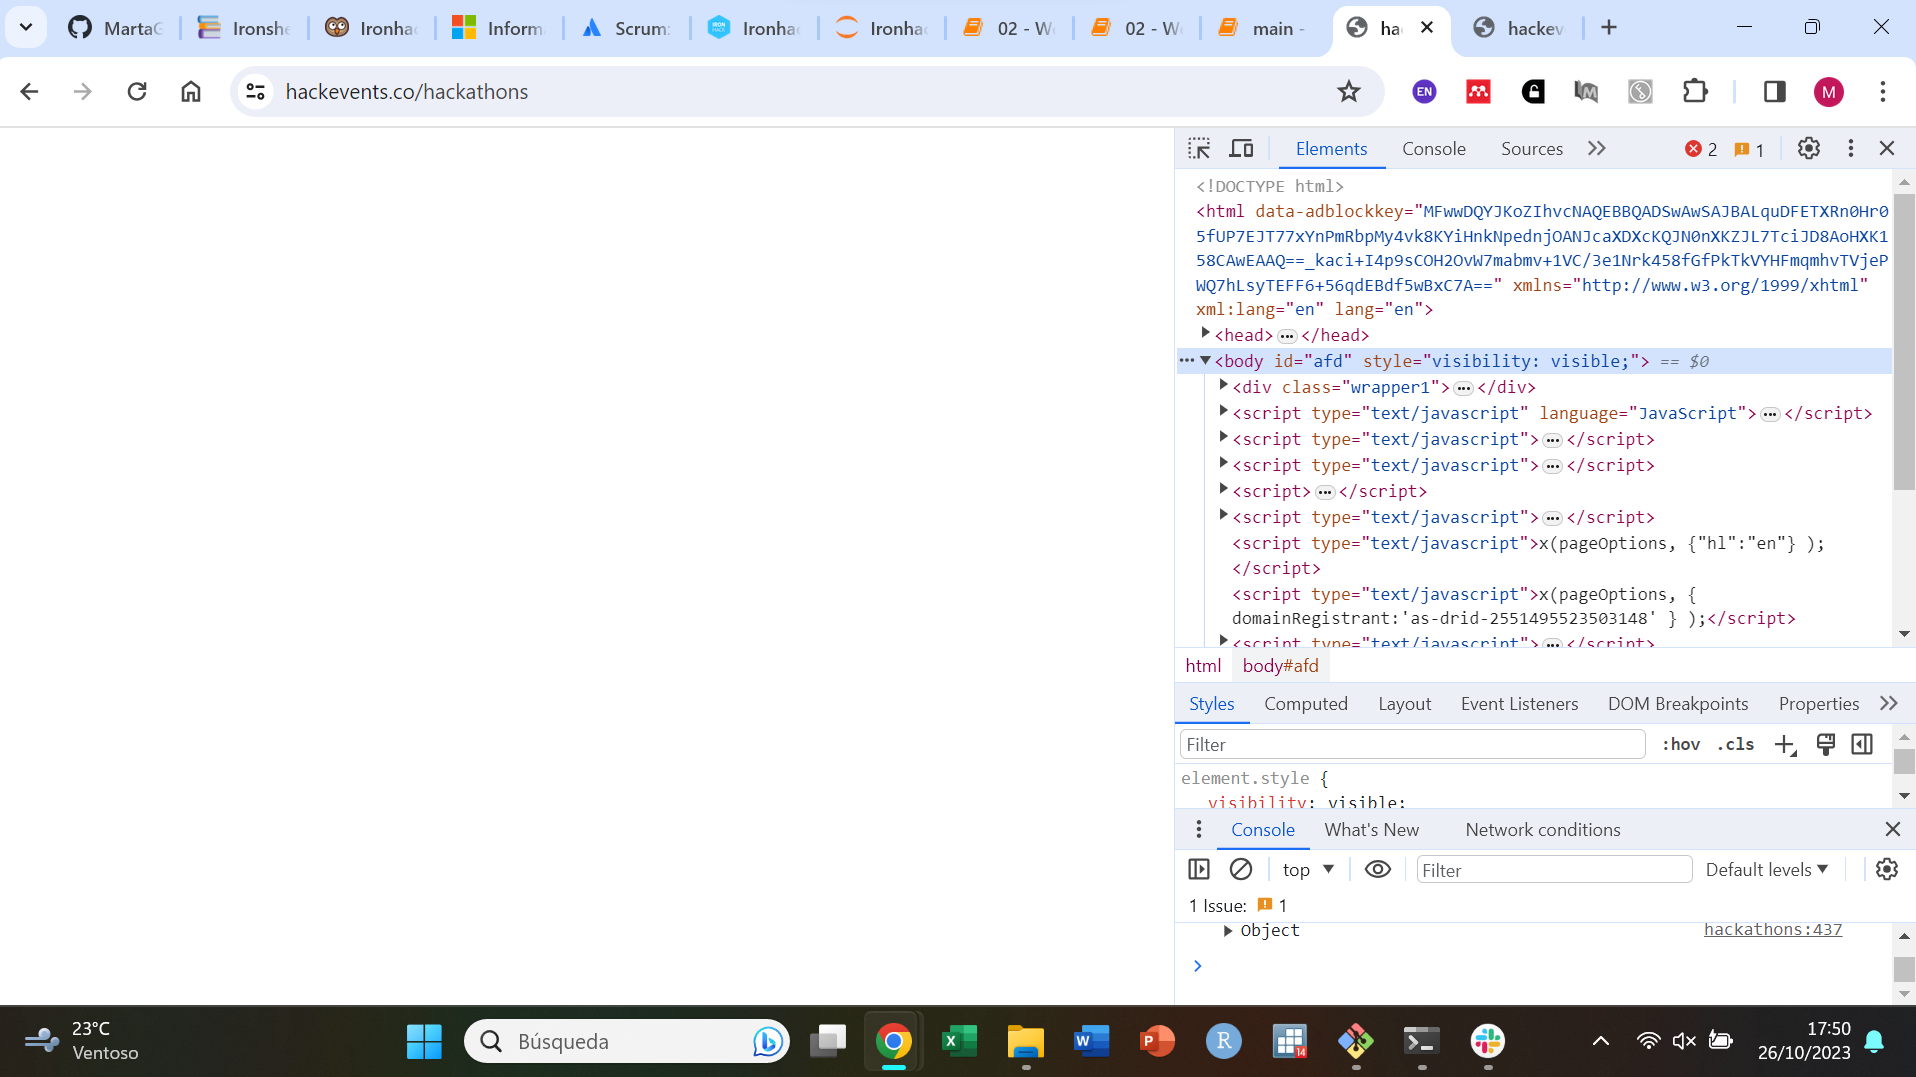

https://hackevents.co/search/anything/anywhere/anytime also returns a blanck webpage
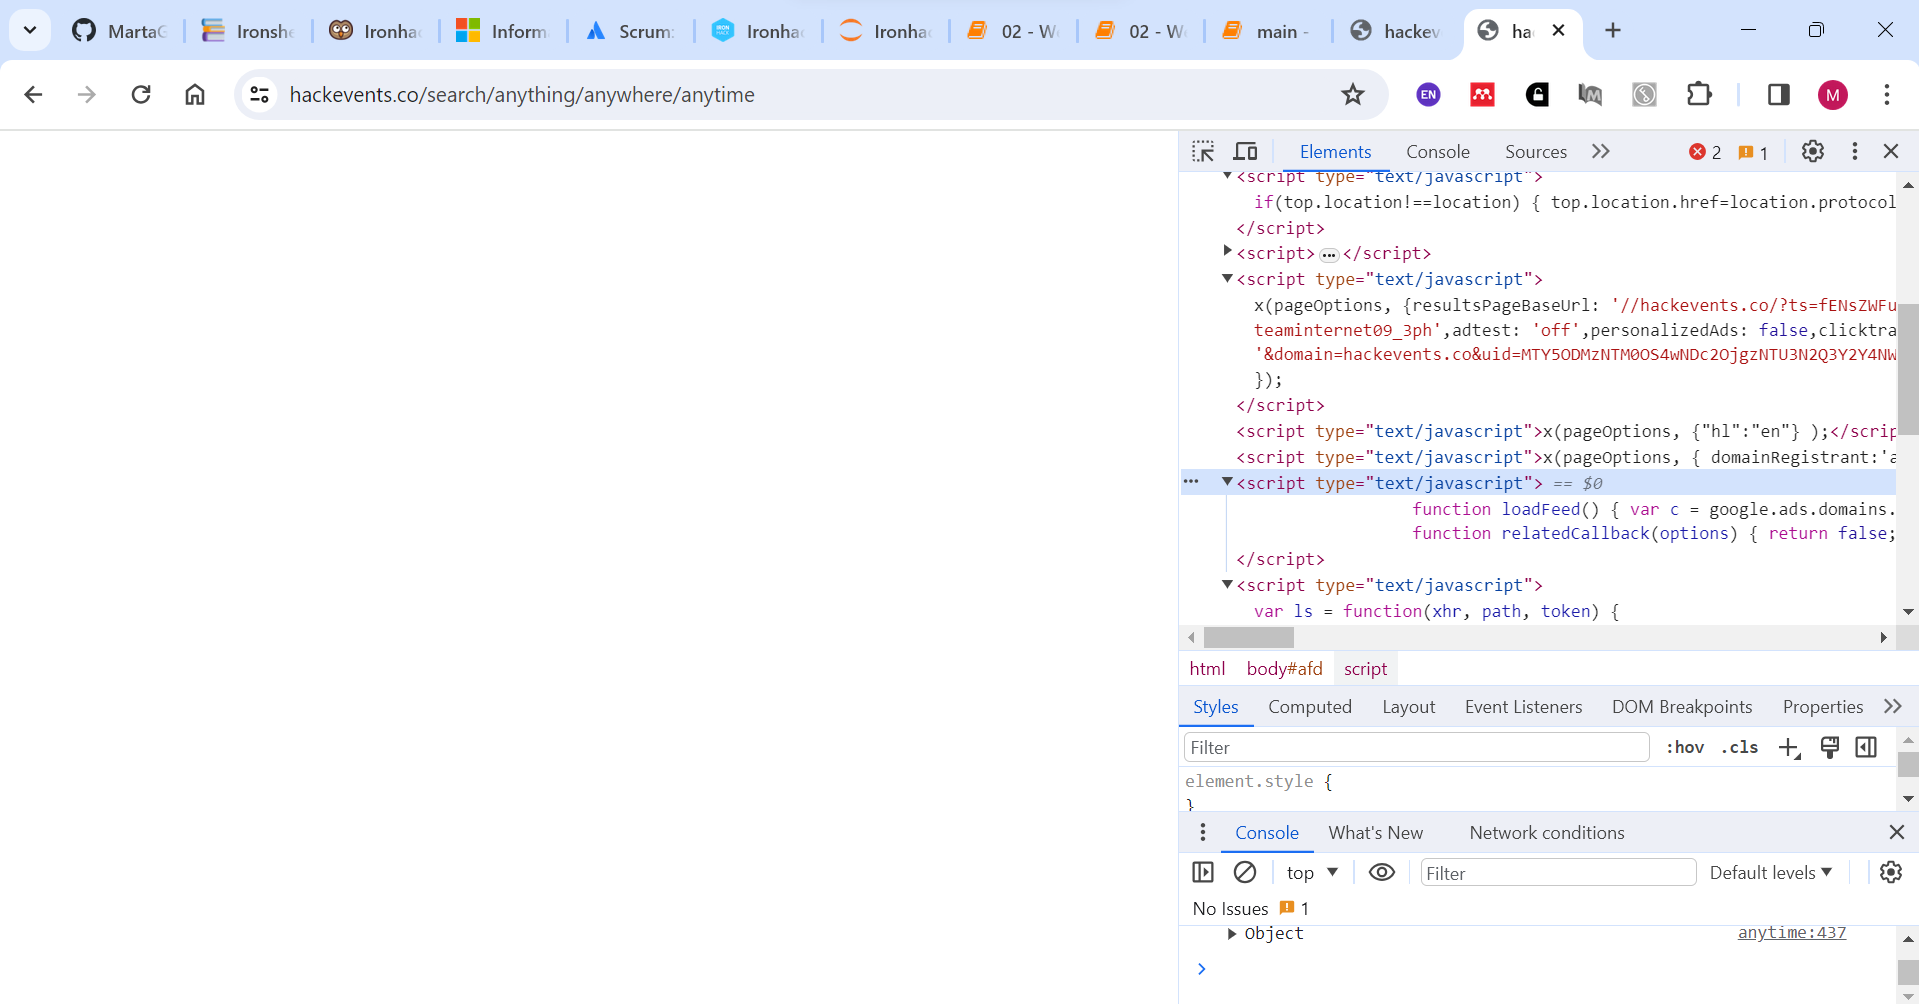

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [117]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [118]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')

In [119]:
lang_unpross = soup.find_all("div", {"dir":"ltr"})
lang = [i.getText().strip().split("\n") for i in lang_unpross]
lang_articles = []
articles = []
for i in range(0, len(lang)):
    lang_articles.append(f"{lang[i][0]}({lang[i][1]})")
for i in range(0, len(lang_articles)):
    print (lang_articles[i])


English(6 715 000+ articles)
日本語(1 387 000+ 記事)
Español(1 892 000+ artículos)
Русский(1 938 000+ статей)
Deutsch(2 836 000+ Artikel)
Français(2 553 000+ articles)
Italiano(1 826 000+ voci)
中文(1 377 000+ 条目 / 條目)
Português(1 109 000+ artigos)


#### A list with the different kind of datasets available in data.gov.uk 

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
#your code 


#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
#your code


#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code
